# Occupancy Models with `Unmarked.jl`

### Fit a Model

First, load required packages:

In [1]:
using Unmarked, DataFrames;

┌ Info: Precompiling Unmarked [d24412d6-d11b-11e9-3460-93a4449a3529]
└ @ Base loading.jl:1423


Simulate an occupancy dataset from formulas and known $\beta$ values:

In [2]:
ψ_formula = @formula(ψ~elev+forest);
p_formula = @formula(p~precip+wind);
β_truth = [0, -0.5, 1.2, -0.2, 0, 0.7];
umd = simulate(Occu, ψ_formula, p_formula, (1000, 5), β_truth);

Fit the model using the formulas and dataset from above:

In [3]:
fit = occu(ψ_formula, p_formula, umd);

### Examine Results

Summary of fitted coefficient values, standard errors, and confidence intervals:

In [4]:
fit


Occupancy: ψ ~ elev + forest
────────────────────────────────────────────────────────────────
             Estimate      SE      z  Pr(>|z|)  Low 95%   Up 95%
────────────────────────────────────────────────────────────────
(Intercept)   -0.0555  0.078    0.71    0.4768  -0.2083   0.0973
elev          -0.3729  0.0792   4.71    <1e-99  -0.5281  -0.2177
forest         1.3448  0.1114  12.07    <1e-99   1.1265   1.563
────────────────────────────────────────────────────────────────

Detection: p ~ precip + wind
────────────────────────────────────────────────────────────────
             Estimate      SE      z  Pr(>|z|)  Low 95%   Up 95%
────────────────────────────────────────────────────────────────
(Intercept)   -0.1841  0.0477   3.86    0.0001  -0.2776  -0.0906
precip        -0.0291  0.0437   0.67    0.5045  -0.1147   0.0564
wind           0.7863  0.0483  16.29    <1e-99   0.6917   0.8809
────────────────────────────────────────────────────────────────

AIC: 4071.2476

Compare to known "true" coefficient values:

In [5]:
DataFrame(coef=coefnames(fit), model=round.(coef(fit), digits=1), 
          truth=β_truth)

,coef,model,truth
,String,Float64,Float64
1,(Intercept),-0.1,0.0
2,elev,-0.4,-0.5
3,forest,1.3,1.2
4,(Intercept),-0.2,-0.2
5,precip,-0.0,0.0
6,wind,0.8,0.7


### Plotting Results

In [6]:
using Gadfly
set_default_plot_size(15cm, 15cm)

Create a plot of coefficient values with 95% confidence intervals:

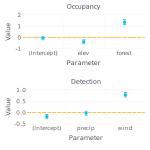

In [7]:
whiskerplot(fit)

Create a marginal effects plot for each covariate over its range:

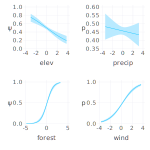

In [8]:
effectsplot(fit)

### Predict Values

Create a data frame containing covariate values for which we want to get predicted occupancy:

In [9]:
pr_df = DataFrame(elev=[0.5, -0.3], forest=[1,-1]);

Predict occupancy using the data frame:

In [10]:
predict(occupancy(fit), pr_df, interval=true) 

(prediction = [0.7507924606530002, 0.21613220135869127], lower = [0.6979513658053658, 0.17521172612604483], upper = [0.7970770607803495, 0.26355574801365456])

### Goodness-of-Fit

Calculate MacKenzie-Bailey goodness-of-fit and $\hat{c}$ for the model: 

In [11]:
gof(fit)

Bootstrap (50 sims) 100%|███████████████████████████████| Time: 0:00:10



MacKenzie-Bailey Goodness-of-fit

  χ2 = 19.0489
  P-value = 0.9200
  Est. c-hat = 0.6895

### Model Selection

Fit models for all subsets of covariates:

In [12]:
fit_all = occu(allsub(ψ_formula), allsub(p_formula), umd);

Fitting 16 models 100%|█████████████████████████████████| Time: 0:00:12


Compare with AIC:

In [13]:
fit_all

┌─────┬──────────────────────────────┬─────────┬────────┬────────┐
│ No. │ Model                        │     AIC │  Δ AIC │ Weight │
├─────┼──────────────────────────────┼─────────┼────────┼────────┤
│ 12  │ ψ(elev+forest)p(wind)        │ 4069.69 │   0.00 │   0.69 │
│ 16  │ ψ(elev+forest)p(precip+wind) │ 4071.25 │   1.56 │   0.31 │
│ 11  │ ψ(forest)p(wind)             │ 4091.22 │  21.53 │   0.00 │
│ 15  │ ψ(forest)p(precip+wind)      │ 4092.83 │  23.14 │   0.00 │
│ 10  │ ψ(elev)p(wind)               │ 4304.39 │ 234.70 │   0.00 │
│ 14  │ ψ(elev)p(precip+wind)        │ 4305.95 │ 236.26 │   0.00 │
│ 9   │ ψ(.)p(wind)                  │ 4315.01 │ 245.32 │   0.00 │
│ 13  │ ψ(.)p(precip+wind)           │ 4316.57 │ 246.88 │   0.00 │
│ 4   │ ψ(elev+forest)p(.)           │ 4387.35 │ 317.66 │   0.00 │
│ 8   │ ψ(elev+forest)p(precip)      │ 4389.34 │ 319.65 │   0.00 │
│ 3   │ ψ(forest)p(.)                │ 4409.20 │ 339.51 │   0.00 │
│ 7   │ ψ(forest)p(precip)           │ 4411.19 │ 341.50 │   0.